## Copias de arrays y vistas

Para poder controlar el uso de memoria y su optimización, **Numpy** no siempre crea un nuevo vector al realizar operaciones. Por ejemplo cuando seleccionamos una parte de un array usando la notación con ":" (*slicing*) devuelve algo que parece un nuevo array pero que en realidad es una nueva vista del mismo array. Lo mismo ocurre con el método `reshape()`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x0 = np.linspace(1,24,24)
print(x0)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


In [4]:
y0 = x0[::2]
print(y0)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23.]


El atributo `base` nos da acceso al objeto que tiene los datos. Por ejemplo, en este caso:

In [5]:
print(x0.base)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


In [6]:
print(y0.base)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


In [7]:
y0.base is x0.base

True

In [8]:
type(x0), type(y0)

(numpy.ndarray, numpy.ndarray)

In [9]:
y0.size, x0.size

(12, 24)

In [10]:
y0[1] = -1
print(x0)

[ 1.  2. -1.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


En este ejemplo, el array `y0` está basado en `x0`, o --lo que es lo mismo-- el objeto base de `y0` es `x0`. Por lo tanto, al modificar uno, se modifica el otro.

Las funciones `reshape` y `transpose` también devuelven **vistas** del array original en lugar de una nueva copia

In [11]:
x0 = np.linspace(1,24,24)
print(x0)
x1 = x0.reshape(6,-1)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


In [12]:
print(x1)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]
 [17. 18. 19. 20.]
 [21. 22. 23. 24.]]


In [13]:
print(x1.base is x0.base)

True


In [14]:
x2 = x1.transpose()
print(x2.base is x0.base)

True


In [15]:
x2

array([[ 1.,  5.,  9., 13., 17., 21.],
       [ 2.,  6., 10., 14., 18., 22.],
       [ 3.,  7., 11., 15., 19., 23.],
       [ 4.,  8., 12., 16., 20., 24.]])

Las "vistas" son referencias al mismo conjunto de datos, pero la información respecto al objeto puede ser diferente. Por ejemplo en el anterior `x0`, `x1` y `x` son diferentes objetos pero con los mismos datos (no sólo iguales)

In [16]:
print(x1.base is x0.base)
print(x2.base is x0.base)
print(x0.shape, x0.strides, x0.dtype)
print(x1.shape, x1.strides, x1.dtype)
print(x2.shape, x2.strides, x2.dtype)

True
True
(24,) (8,) float64
(6, 4) (32, 8) float64
(4, 6) (8, 32) float64


Los datos en los tres objetos están compartidos:

In [17]:
print('original')
print('x2 =',x2)
x0[-1] =-1
print('x0 =',x0)

original
x2 = [[ 1.  5.  9. 13. 17. 21.]
 [ 2.  6. 10. 14. 18. 22.]
 [ 3.  7. 11. 15. 19. 23.]
 [ 4.  8. 12. 16. 20. 24.]]
x0 = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. -1.]


In [18]:
print('cambiado')
print('x2 =',x2)

cambiado
x2 = [[ 1.  5.  9. 13. 17. 21.]
 [ 2.  6. 10. 14. 18. 22.]
 [ 3.  7. 11. 15. 19. 23.]
 [ 4.  8. 12. 16. 20. -1.]]


In [19]:
print('x1 =',x1)

x1 = [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]
 [17. 18. 19. 20.]
 [21. 22. 23. -1.]]


## Indexado avanzado 


### Indexado con secuencias de índices

Consideremos un vector simple, y elijamos algunos de sus elementos

In [20]:
x = np.linspace(0,3,7)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [21]:
# Standard slicing
v1=x[1::2]
v1

array([0.5, 1.5, 2.5])

Esta es la manera simple de seleccionar elementos de un array, y como vimos lo que se obtiene es una vista del mismo array. **Numpy** permite además seleccionar partes de un array usando otro array de índices:

In [22]:
# Array Slicing con índices ind
i1 = np.array([1,3,-1,0])   
v2 = x[i1]

In [23]:
print(x)
print(x[i1])

[0.  0.5 1.  1.5 2.  2.5 3. ]
[0.5 1.5 3.  0. ]


In [24]:
print(v1.base is x.base)
print(v2.base is x.base)

True
False


In [25]:
x[[1,2,-1]]

array([0.5, 1. , 3. ])

Los índices negativos funcionan en exactamente la misma manera que en el caso simple. 

Es importante notar que cuando se usan arrays índices, lo que se obtiene es un nuevo array (no una vista), y este nuevo array tiene las dimensiones (`shape`) del array de índices

In [28]:
i2 = np.array([[1,0],[2,1]])
v3= x[i2]
print(x)
print(v3)
print('x  shape:', x.shape)
print('v3 shape:', v3.shape)

[0.  0.5 1.  1.5 2.  2.5 3. ]
[[0.5 0. ]
 [1.  0.5]]
x  shape: (7,)
v3 shape: (2, 2)


### Índices de arrays multidimensionales

In [29]:
y = np.arange(12,0,-1).reshape(3,4)+0.5
y

array([[12.5, 11.5, 10.5,  9.5],
       [ 8.5,  7.5,  6.5,  5.5],
       [ 4.5,  3.5,  2.5,  1.5]])

In [30]:
print(y[0])                     # Primera fila
print(y[2])                     # Última fila


[12.5 11.5 10.5  9.5]
[4.5 3.5 2.5 1.5]


In [31]:
i = np.array([0,2])
print(y[i])       # Primera y última fila

[[12.5 11.5 10.5  9.5]
 [ 4.5  3.5  2.5  1.5]]


Si usamos más de un array de índices para seleccionar elementos de un array multidimensional, cada array de índices se refiere a una dimensión diferente. Consideremos el array `y`

In [32]:
print(y)

[[12.5 11.5 10.5  9.5]
 [ 8.5  7.5  6.5  5.5]
 [ 4.5  3.5  2.5  1.5]]


![](figuras/adv_index.png)

Si queremos elegir los elementos en los lugares `[0,1], [1,2], [0,3], [1,1]` (en ese orden) 
podemos crear dos array de índices con los valores correspondientes a cada dimensión

In [33]:
i = np.array([0,1,0,1])
j = np.array([1,2,3,1])
print(y[i,j])

[11.5  6.5  9.5  7.5]


### Indexado con condiciones

Además de usar notación de *slices*, e índices también podemos seleccionar partes de arrays usando una matriz de condiciones. Primero creamos una matriz de coniciones `c`

In [34]:
c = False*np.empty((3,4), dtype='bool')
print(c)

[[False False False False]
 [False False False False]
 [False False False False]]


In [35]:
False*np.empty((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [36]:
c[i,j]= True                    # Aplico la notación de índice avanzado
print(c)

[[False  True False  True]
 [False  True  True False]
 [False False False False]]


Como vemos, `c` es una matriz con la misma forma que `y`. Esto permite seleccionar los valores donde el array de condiciones es verdadero:

In [37]:
y[c]

array([11.5,  9.5,  7.5,  6.5])

Esta es una notación  potente. Por ejemplo, si en el array anterior queremos seleccionar todos los valores que sobrepasan cierto umbral (por ejemplo, los valores mayores a 7)

In [38]:
print(y)
c1 = (y > 7)
print(c1)

[[12.5 11.5 10.5  9.5]
 [ 8.5  7.5  6.5  5.5]
 [ 4.5  3.5  2.5  1.5]]
[[ True  True  True  True]
 [ True  True False False]
 [False False False False]]


El resultado de una comparación es un array donde cada elemento es un variable lógica (`True` o `False`). Podemos utilizarlo para seleccionar los valores que cumplen la condición dada. Por ejemplo

In [39]:
y[c1]

array([12.5, 11.5, 10.5,  9.5,  8.5,  7.5])

De la misma manera, si queremos todos los valores entre 4 y 7 (incluidos), podemos hacer

In [40]:
y[(y >= 4) & (y <= 7)]

array([6.5, 5.5, 4.5])

Como mostramos en este ejemplo, no es necesario crear la matriz de condiciones previamente.

**Numpy** tiene funciones especiales para analizar datos de array que sirven para quedarse con los valores que cumplen ciertas condiciones. La función `nonzero` devuelve los índices donde el argumento no se anula:

In [41]:
c1 = (y>=4) & (y <=7)
np.nonzero(c1)


(array([1, 1, 2]), array([2, 3, 0]))

Esta es la notación de avanzada de índices, y nos dice que los elementos cuya condición es diferente de cero (`True`) están en las posiciones: `[1,2], [1,3], [2,0]`. 

In [42]:
indx, indy = np.nonzero(c1)
print('indx =', indx)
print('indy =', indy)

indx = [1 1 2]
indy = [2 3 0]


In [43]:
for i,j in zip(indx, indy):
  print('y[{},{}]={}'.format(i,j,y[i,j]))

y[1,2]=6.5
y[1,3]=5.5
y[2,0]=4.5


In [44]:
print(np.nonzero(c1))
print(np.transpose(np.nonzero(c1)))
print(y[np.nonzero(c1)])

(array([1, 1, 2]), array([2, 3, 0]))
[[1 2]
 [1 3]
 [2 0]]
[6.5 5.5 4.5]


El resultado de `nonzero()` se puede utilizar directamente para elegir los elementos con la notación de índices avanzados, y su transpuesta es un array  donde cada elemento es un índice donde no se anula.

Existe la función `np.argwhere()` que es lo mismo que ``np.transpose(np.nonzero(a))``.

Otra función que sirve para elegir elementos basados en alguna condición es `np.compress(condition, a, axis=None, out=None)` que acepta un array unidimensional como condición

In [46]:
c2 = np.ravel(c1)
print(c2)
print(y)
print(np.compress(c2,y))

[False False False False False False  True  True  True False False False]
[[12.5 11.5 10.5  9.5]
 [ 8.5  7.5  6.5  5.5]
 [ 4.5  3.5  2.5  1.5]]
[6.5 5.5 4.5]


La función `extract` es equivalente a convertir los dos vectores (condición y datos) a una dimensión (`ravel`) y luego aplicar `compress`

In [47]:
np.extract(c1, y)

array([6.5, 5.5, 4.5])

In [48]:
print(y)

[[12.5 11.5 10.5  9.5]
 [ 8.5  7.5  6.5  5.5]
 [ 4.5  3.5  2.5  1.5]]


### Función where

La función `where` permite operar condicionalmente sobre algunos elementos.  Por ejemplo, si queremos convolucionar el vector `y` con un escalón localizado en la región `[2,8]`:

In [49]:
np.where((y > 2) &  (y < 8) , y, 0)

array([[0. , 0. , 0. , 0. ],
       [0. , 7.5, 6.5, 5.5],
       [4.5, 3.5, 2.5, 0. ]])

Por ejemplo, para implementar la función de Heaviside

In [50]:
import matplotlib.pyplot as plt

def H(x):
  return np.where(x < 0, 0, 1)
x = np.linspace(-1,1,11)
H(x)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

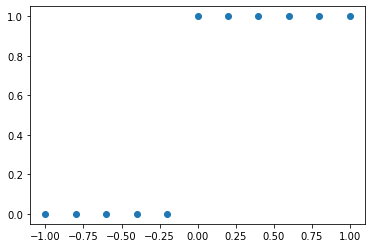

In [51]:
plt.plot(x,H(x), 'o')

## Extensión de las dimensiones (*Broadcasting*)

Vimos que en **Numpy** las operaciones (y comparaciones) se realizan "elemento a elemento". Sin embargo usamos expresiones del tipo `y > 4` donde comparamos un `ndarray` con un escalar. En este caso, lo que hace **Numpy** es extender automáticamente el escalar a un array de las mismas dimensiones que `y`

```python
  4 -> 4*np.ones(y.shape)
  ```

Hagamos esto explícitamente

In [52]:
y

array([[12.5, 11.5, 10.5,  9.5],
       [ 8.5,  7.5,  6.5,  5.5],
       [ 4.5,  3.5,  2.5,  1.5]])

In [53]:
y4 = 4*np.ones(y.shape)
np.all((y > y4) == (y > 4)) # np.all devuelve True si **TODOS** los elementos son iguales

True

De la misma manera, hay veces que podemos operar sobre arrays de distintas dimensiones

In [54]:
y4

array([[4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])

In [55]:
y + y4

array([[16.5, 15.5, 14.5, 13.5],
       [12.5, 11.5, 10.5,  9.5],
       [ 8.5,  7.5,  6.5,  5.5]])

In [56]:
y + 4

array([[16.5, 15.5, 14.5, 13.5],
       [12.5, 11.5, 10.5,  9.5],
       [ 8.5,  7.5,  6.5,  5.5]])

Como vemos eso es igual a `y + 4*np.ones(y.shape)`. En general, si Numpy puede transformar los arreglos para que todos tengan el mismo tamaño, lo hará en forma automática. 

Las reglas de la extensión automática son:

1. La extensión se realiza por dimensión. Dos dimensiones son compatibles si son iguales o una de ellas es 1.
2. Si los dos `arrays` difieren en el número de dimensiones, el que tiene menor dimensión se llena con `1` (unos) en el primer eje.

Veamos algunos ejemplos:


In [57]:
x = np.arange(0,40,10)
xx = x.reshape(4,1)
y = np.arange(3)

In [58]:
print(x.shape, xx.shape, y.shape)

(4,) (4, 1) (3,)


In [59]:
print(xx)

[[ 0]
 [10]
 [20]
 [30]]


In [60]:
print(y)

[0 1 2]


In [61]:
print(xx+y)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Lo que está pasando es algo así como:

  * xx -> xxx
  * y ->  yyy
  * xx + y -> xxx + yyy

![](figuras/numpy_broadcasting.png)

donde `xxx`, `yyy` son versiones extendidas de los vectores originales:

In [62]:
xxx = np.tile(xx, (1, y.size))
yyy = np.tile(y, (xx.size, 1))

In [63]:
print(xxx)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]


In [64]:
print(yyy)

[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]


In [65]:
print(xxx + yyy)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


## Unir (o concatenar) *arrays*

Si queremos unir dos *arrays* para formar un tercer *array* **Numpy** tiene una función llamada `concatenate`, que recibe una secuencia de arrays y devuelve su unión a lo largo de un eje.

### Apilamiento vertical

In [66]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8], [9,10]])
print('a=\n',a)
print('b=\n',b)

a=
 [[1 2]
 [3 4]]
b=
 [[ 5  6]
 [ 7  8]
 [ 9 10]]


In [67]:
# El eje 0 es el primero, y corresponde a apilamiento vertical
np.concatenate((a, b), axis=0)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [68]:
np.concatenate((a, b))          # axis=0 es el default

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [69]:
np.vstack((a, b))    # Une siempre verticalmente (primer eje)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

Veamos cómo utilizar esto cuando tenemos más dimensiones. 

In [70]:
c = np.array([[[1, 2], [3, 4]],[[-1,-2],[-3,-4]]])
d = np.array([[[5, 6], [7, 8]], [[9,10], [-5, -6]], [[-7, -8], [-9,-10]]])
print('c: shape={}\n'.format(c.shape),c)
print('\nd: shape={}\n'.format(d.shape),d)


c: shape=(2, 2, 2)
 [[[ 1  2]
  [ 3  4]]

 [[-1 -2]
  [-3 -4]]]

d: shape=(3, 2, 2)
 [[[  5   6]
  [  7   8]]

 [[  9  10]
  [ -5  -6]]

 [[ -7  -8]
  [ -9 -10]]]


Como tienen todas las dimensiones iguales, excepto la primera, podemos concatenarlos a lo largo del eje 0 (verticalmente)

In [71]:
np.vstack((c,d))

array([[[  1,   2],
        [  3,   4]],

       [[ -1,  -2],
        [ -3,  -4]],

       [[  5,   6],
        [  7,   8]],

       [[  9,  10],
        [ -5,  -6]],

       [[ -7,  -8],
        [ -9, -10]]])

In [72]:
e=np.concatenate((c,d),axis=0)

In [73]:
print(e.shape)
print(e)

(5, 2, 2)
[[[  1   2]
  [  3   4]]

 [[ -1  -2]
  [ -3  -4]]

 [[  5   6]
  [  7   8]]

 [[  9  10]
  [ -5  -6]]

 [[ -7  -8]
  [ -9 -10]]]


### Apilamiento horizontal

Si tratamos de concatenar `a`y `b` a lo largo de otro eje vamos a recibir un error porque la forma de los `arrays` no es compatible.

In [74]:
b.T

array([[ 5,  7,  9],
       [ 6,  8, 10]])

In [75]:
print(a.shape, b.shape, b.T.shape)

(2, 2) (3, 2) (2, 3)


In [76]:
np.concatenate((a, b.T), axis=1)

array([[ 1,  2,  5,  7,  9],
       [ 3,  4,  6,  8, 10]])

In [77]:
np.hstack((a,b.T))              # Como vstack pero horizontalmente

array([[ 1,  2,  5,  7,  9],
       [ 3,  4,  6,  8, 10]])

![](figuras/ilust_hstack.png) 

## Generación de números aleatorios

**Python** tiene un módulo para generar números al azar, sin embargo vamos a utilizar el módulo de **Numpy** llamado `random`. Este módulo tiene funciones para generar números al azar siguiendo varias distribuciones más comunes. Veamos que hay en el módulo

In [78]:
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'PCG64DXSM',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponen

### Distribución uniforme

Si elegimos números al azar con una distribución de probabilidad uniforme, la probabilidad de que el número elegido caiga en un intervalo dado es simplemente proporcional al tamaño del intervalo. 

In [79]:
x= np.random.random((4,2))
y = np.random.random(8)
print(x)

[[0.89398968 0.661581  ]
 [0.01149467 0.80208523]
 [0.76960027 0.67185184]
 [0.30586482 0.9476556 ]]


In [80]:
y

array([0.10805669, 0.08933825, 0.45591515, 0.93319955, 0.11794976,
       0.31490434, 0.21031763, 0.72402371])

In [81]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



Como se infiere de este resultado, la función `random` (o `random_sample`) nos da una distribución de puntos aleatorios entre 0 y 1, uniformemente distribuidos.


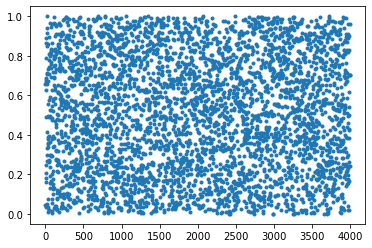

In [84]:
plt.plot(np.random.random(4000), '.')
plt.show()

In [ ]:
help(np.random.uniform)

### Distribución normal (Gaussiana)

Una distribución de probabilidad normal tiene la forma Gaussiana

$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }.$$ En **Numpy** la función que nos da elementos con esa distribución de probabilidad es: 

`np.random.normal(loc=0.0, scale=1.0, size=None)`

donde:
 - `loc` es la posición del máximo (valor medio)
 - `scale` es el ancho de la distribución
 - `size` es el número de puntos a calcular (o forma)
 


In [86]:
z = np.random.normal(size=4000)

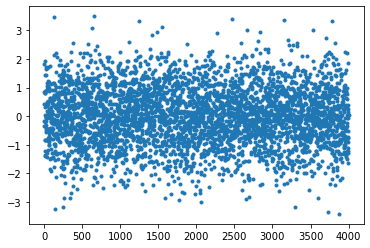

In [87]:
plt.plot( z, '.')
plt.show()

In [88]:
np.random.normal(size=(3,5))

array([[ 1.89330409, -0.82678319,  0.28456255, -0.20158241, -0.93699684],
       [-0.65001554, -0.07082357,  0.28431164,  1.03876825, -0.75345833],
       [-1.3222013 ,  0.55723735, -0.01766518,  0.13955381, -0.75881249]])

### Histogramas

Para visualizar los números generados y comparar su ocurrencia con la distribución de probabilidad 
vamos a generar histogramas usando *Numpy* y *Matplotlib*

In [89]:
h,b = np.histogram(z, bins=20)

In [90]:
b

array([-3.41410287, -3.06867165, -2.72324042, -2.3778092 , -2.03237797,
       -1.68694674, -1.34151552, -0.99608429, -0.65065307, -0.30522184,
        0.04020938,  0.38564061,  0.73107183,  1.07650306,  1.42193429,
        1.76736551,  2.11279674,  2.45822796,  2.80365919,  3.14909041,
        3.49452164])

In [91]:
h

array([  5,   9,  27,  45, 104, 177, 275, 390, 488, 554, 548, 451, 350,
       267, 161,  88,  33,  14,   8,   6])

In [92]:
b.size, h.size

(21, 20)

La función retorna `b`: los límites de los intervalos en el eje x y `h` las alturas

In [93]:
x = (b[1:] + b[:-1])/2

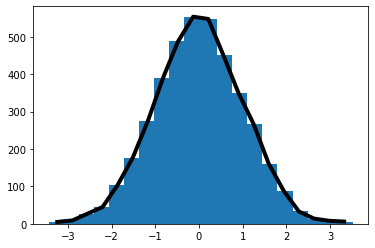

In [95]:
plt.bar(x,h, align="center", width=0.4)
plt.plot(x,h, 'k', lw=4)
plt.show()

**Matplotlib** tiene una función similar, que directamente realiza el gráfico

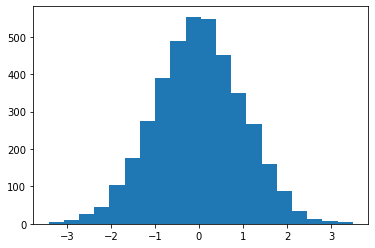

In [96]:
h1, b1, p1 = plt.hist(z, bins=20)
#x1 = (b1[:-1] + b1[1:])/2
#plt.plot(x1, h1, '-k', lw=4)
plt.show()

In [97]:
print(h1.size, b1.size)

20 21


Veamos otro ejemplo, agregando algún otro argumento opcional

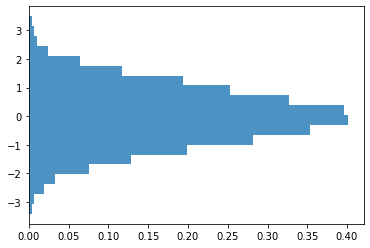

In [98]:
plt.hist(z, bins=20, density=True, orientation='horizontal', 
         alpha=0.8, histtype='stepfilled')
plt.show()

En este último ejemplo, cambiamos la orientación a `horizontal` y además normalizamos los resultados, de manera tal que la integral bajo (a la izquierda de, en este caso) la curva sea igual a 1.

### Distribución binomial

Cuando ocurre un evento que puede tener sólo dos resultados (verdadero, con probabilidad $p$, y falso con probabilidad $(1-p)$) y lo repetimos $N$ veces, la probabilidad de obtener el resultado con probabilidad $p$ es

$$
P(n) = \binom{N}{n}p^{n}(1-p)^{N-n},
$$

Para elegir números al azar con esta distribución de probabilidad **Numpy** tiene la función `binomial`,  cuyo primer argumento es $N$ y el segundo $p$. Por ejemplo si tiramos una moneda 100 veces, y queremos saber cuál es la probabilidad de obtener cara $n$ veces podemos usar:

In [99]:
zb = np.random.binomial(100,0.5,size=30000)

Text(0.5, 0, '$n$ (veces "cara")')

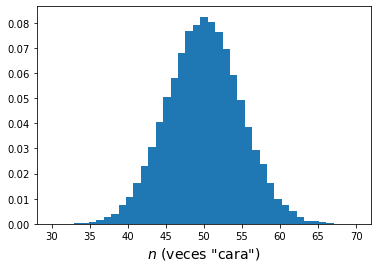

In [100]:
plt.hist(zb, bins=41, density=True, range=(30,70))
plt.xlabel('$n$ (veces "cara")')

In [ ]:
help(np.random.binomial)

Este gráfico ilustra la probabilidad de obtener $n$ veces un lado (cara) si tiramos 100 veces una moneda, como función de $n$.

-----

## Ejercicios 10 (b)

2. Vamos a estudiar la frecuencia de aparición de cada dígito en la serie de Fibonacci, generada siguiendo las reglas:
$$a_{1} = a_{2} = 1, \quad a_{i} = a_{i-1} + a_{i-2}.$$

  Se pide:

  1. Crear una función que acepta como argumento un número entero $N$ y retorna una secuencia (lista, tupla, diccionario o *array*) con los elementos de la serie de Fibonacci.
  2. Crear una función que devuelva un histograma de ocurrencia de cada uno de los dígitos en el primer lugar del número. Por ejemplo para los primeros 8 valores ($N=8$): $1,1,2,3,5,8,13,21$ tendremos que el $1$ aparece 3 veces, el $2$ aparece $2$ veces, $3, 5, 8$ una vez. Normalizar los datos dividiendo por el número de valores $N$.
  3. Utilizando las dos funciones anteriores graficar el histograma para un número $N$ grande y comparar los resultados con la ley de Benford
  $$P(n) = \log_{10}\left(1+ \frac{1}{d} \right). $$


2. **PARA ENTREGAR:** Estimar el valor de π usando diferentes métodos basados en el método de Monte Carlo:

    1. Crear una función para calcular el valor de $\pi$ usando el "método de cociente de áreas". Para ello:

      * Generar puntos en el plano dentro del cuadrado de lado unidad cuyo lado inferior va de $x=0$ a $x=1$
      * Contar cuantos puntos caen dentro del (cuarto de) círculo unidad. Este número tiende a ser proporcional al área del círculo
      * La estimación de $\pi$ será igual a cuatro veces el cociente de números dentro del círculo dividido por el número total de puntos.

    2. Crear una función para calcular el valor de $\pi$ usando el "método del valor medio":
       Este método se basa en la idea de que el valor medio de una función se puede calcular de la siguiente manera:

    $$ \langle f \rangle = \frac{1}{b-a} \int_{a}^{b} f(x)\, dx $$

    Tomando la función particular $f(x)= \sqrt{1- x^{2}}$ entre $x=0$ y $x=1$, obtenemos:

    $$ \langle f \rangle = \int_{0}^{1} \sqrt{1- x^{2}}\, dx = \frac{\pi}{4} $$

    Entonces, tenemos que estimar el valor medio de la función $f$ y, mediante la relación anterior obtener $\pi = 4 \langle f(x) \rangle$. Para obtener el valor medio de la función notamos que si tomamos $X$ es una variable aleatoria entre 0 y 1, entonces el valor medio de $f(X)$ es justamente $\langle f \rangle$. Su función debe entonces

      * Generar puntos aleatoriamente en el intervalo $[0,1]$
      * Calcular el valor medio de $f(x)$ para los puntos aleatorios $x$.
      * El resultado va a ser igual al valor de la integral, y por lo tanto a $\pi/4$.

    3. Utilizar las funciones anteriores con diferentes valores para el número total de puntos $N$. En particular, hacerlo para 20 valores de $N$  equiespaciados logarítmicamente entre 100 y 10000. Para cada valor de $N$ calcular la estimación de $\pi$. Realizar un gráfico con el valor estimado como función del número $N$ con los dos métodos (dos curvas en un solo gráfico)

    4. Para $N=15000$ repetir el "experimento" muchas veces (al menos 1000) y realizar un histograma de los valores obtenidos para $\pi$ con cada método. Graficar el histograma y calcular la desviación standard. Superponer una función Gaussiana con el mismo ancho. El gráfico debe ser similar al siguiente (*el estilo de graficación no tiene que ser el mismo*)

    ![](figuras/ejercicio_09_1.png)
    
    5. El método de la aguja del bufón se puede utilizar para estimar el valor de $\pi$, y consiste en tirar agujas (o palitos, fósforos, etc) al azar sobre una superficie rayada

    ![](figuras/Streicholz-Pi-wiki.jpg)

    Por simplicidad vamos a considerar que la distancia entre rayas $t$ es mayor que la longitud de las agujas $\ell$

    ![](figuras/Buffon_needle_wiki.png)

    La probabilidad de que una aguja cruce una línea será:

    $$ P = \frac{2 \ell}{t\, \pi} $$

    por lo que podemos calcular el valor de $\pi$ si estimamos la probabilidad $P$. Realizar una función que estime $\pi$ utilizando este método y repetir las comparaciones de los dos puntos anteriores pero ahora utilizando este método y el de las áreas.
    
-----

.